In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from keras.applications import VGG19
from keras.applications import ResNet50
from keras.applications import ResNet152

In [2]:
print(os.listdir("D:/A/parkinsons-drawings"))

['spiral', 'wave']


In [3]:
import cv2

# Load the original image
original_image = cv2.imread("D:/AIML/xyz/PatientSpiral/sp2-P7.jpg")

# Get original image dimensions and number of channels
original_height, original_width, original_channels = original_image.shape
print(original_channels)
print(original_height)
print(original_width)
print(original_image.shape)

# Number of features before preprocessing
num_features_before = original_height * original_width * original_channels

# Perform preprocessing (e.g., resizing, color conversion, etc.)
# For illustration purposes, let's resize the image to (224, 224) and convert it to grayscale
preprocessed_image = cv2.resize(original_image, (224, 224))
preprocessed_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2GRAY)

# Get preprocessed image dimensions and number of channels
preprocessed_height, preprocessed_width = preprocessed_image.shape
preprocessed_channels = 1  # Grayscale image has only one channel

# Number of features after preprocessing
num_features_after = preprocessed_height * preprocessed_width * preprocessed_channels

print("Number of features before preprocessing:", num_features_before)
print("Number of features after preprocessing:", num_features_after)


3
706
706
(706, 706, 3)
Number of features before preprocessing: 1495308
Number of features after preprocessing: 50176


In [4]:
SIZE = 224  #Resize images

### Capture training data and labels into respective lists

In [5]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("D:/AIML/xyz/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

HealthySpiral
D:/AIML/xyz\HealthySpiral\sp1-H32.jpg
D:/AIML/xyz\HealthySpiral\sp1-H33.jpg
D:/AIML/xyz\HealthySpiral\sp1-H34.jpg
D:/AIML/xyz\HealthySpiral\sp1-H35.jpg
D:/AIML/xyz\HealthySpiral\sp1-H36.jpg
D:/AIML/xyz\HealthySpiral\sp1-H37.jpg
D:/AIML/xyz\HealthySpiral\sp1-H38.jpg
D:/AIML/xyz\HealthySpiral\sp2-H1.jpg
D:/AIML/xyz\HealthySpiral\sp2-H10.jpg
D:/AIML/xyz\HealthySpiral\sp2-H11.jpg
D:/AIML/xyz\HealthySpiral\sp2-H12.jpg
D:/AIML/xyz\HealthySpiral\sp2-H13.jpg
D:/AIML/xyz\HealthySpiral\sp2-H14.jpg
D:/AIML/xyz\HealthySpiral\sp2-H16.jpg
D:/AIML/xyz\HealthySpiral\sp2-H17.jpg
D:/AIML/xyz\HealthySpiral\sp2-H18.jpg
D:/AIML/xyz\HealthySpiral\sp2-H19.jpg
D:/AIML/xyz\HealthySpiral\sp2-H2.jpg
D:/AIML/xyz\HealthySpiral\sp2-H20.jpg
D:/AIML/xyz\HealthySpiral\sp2-H21.jpg
D:/AIML/xyz\HealthySpiral\sp2-H22.jpg
D:/AIML/xyz\HealthySpiral\sp2-H23.jpg
D:/AIML/xyz\HealthySpiral\sp2-H24.jpg
D:/AIML/xyz\HealthySpiral\sp2-H26.jpg
D:/AIML/xyz\HealthySpiral\sp2-H27.jpg
D:/AIML/xyz\HealthySpiral\sp2-H28.jpg


In [6]:
len(train_labels)

211

### Capture test/validation data and labels into respective lists

In [7]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("D:/AIML/xyztest/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

HealthySpiral
D:/AIML/xyztest\HealthySpiral\sp1-H1.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H10.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H11.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H12.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H13.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H14.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H16.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H17.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H18.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H19.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H2.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H20.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H21.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H22.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H23.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H24.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H26.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H27.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H28.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H29.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H3.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H30.jpg
D:/AIML/xyztest\HealthySpiral\sp1-H31.jpg
D:/AIML/xyztest\Healthy

In [8]:
len(test_labels)

53

### Label Encoding

In [9]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
# Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [10]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

### Normalize Pixels

In [11]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
x_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [13]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

### Load VGG16 model

In [14]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

### Load VGG19 model

In [15]:
VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

### load ResNet50 model

In [16]:
ResNet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [17]:
ResNet152_model = ResNet152(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [18]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# last_conv_layer = VGG_model.get_layer('block5_conv3').output
# num_filters = 1024  # Change this to the desired number of filters
# new_conv_layer = Conv2D(num_filters, (3, 3), activation='relu', padding='same', name='new_conv_layer')(last_conv_layer)
# max_pooling_layer = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling_layer')(new_conv_layer)
# # Create a new model by replacing the last convolutional layer with the new one
# VGG_model = Model(inputs=VGG_model.input, outputs=max_pooling_layer)
# VGG_model.summary()

In [20]:
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
# ResNet_model.summary()

In [23]:
for layer in VGG_model.layers:
	layer.trainable = False

VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
for layer in VGG19_model.layers:
	layer.trainable = False

VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
for layer in ResNet_model.layers:
	layer.trainable = False

# ResNet_model.summary()

In [26]:
# ResNet152_model.summary()

In [27]:
for layer in ResNet152_model.layers:
	layer.trainable = False

# ResNet152_model.summary()

In [28]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
# features

7/7 [==============================] - 20s 3s/step


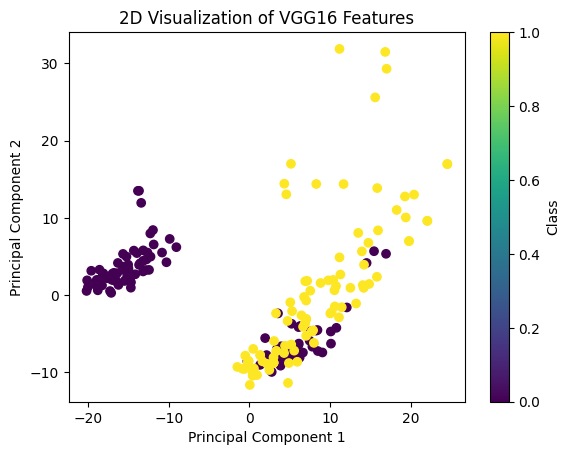

In [29]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # You can choose the number of components as per your requirement
features_vgg_pca = pca.fit_transform(features)

# Plot the features
plt.scatter(features_vgg_pca[:, 0], features_vgg_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of VGG16 Features')
plt.colorbar(label='Class')
plt.show()

In [30]:
len(features[0])

25088

In [31]:
#Now, let us use features from convolutional network for RF
feature_extractor_vgg19=VGG19_model.predict(x_train)

features_vgg19 = feature_extractor_vgg19.reshape(feature_extractor_vgg19.shape[0], -1)

7/7 [==============================] - 24s 3s/step


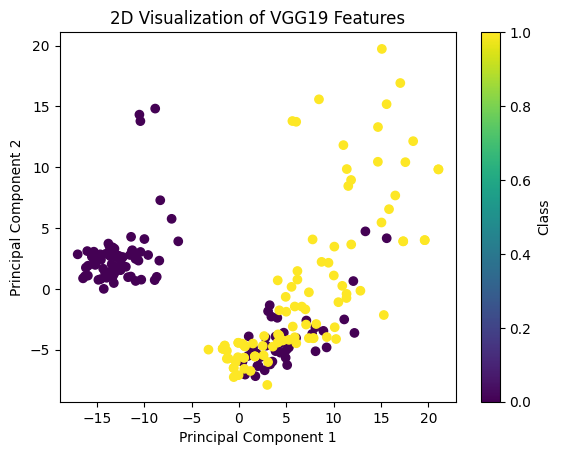

In [32]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # You can choose the number of components as per your requirement
features_vgg19_pca = pca.fit_transform(features_vgg19)

# Plot the features
plt.scatter(features_vgg19_pca[:, 0], features_vgg19_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of VGG19 Features')
plt.colorbar(label='Class')
plt.show()

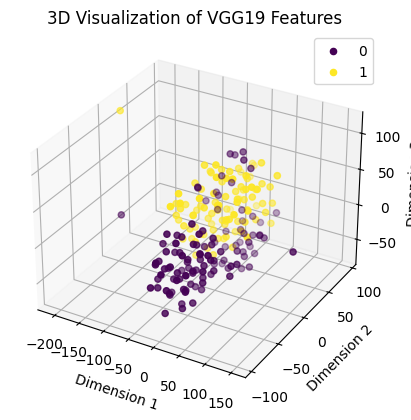

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)  # You can choose the number of components as per your requirement
features_vgg19_tsne = tsne.fit_transform(features_vgg19)

# Plot the features in 3D with different colors for each class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors for each class
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_train))))

for i, label in enumerate(np.unique(y_train)):
    ax.scatter(features_vgg19_tsne[y_train == label, 0],
               features_vgg19_tsne[y_train == label, 1],
               features_vgg19_tsne[y_train == label, 2],
               c=[colors[i]], label=label)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('3D Visualization of VGG19 Features')
plt.legend()
plt.show()

In [34]:
feature_extractor_resnet=ResNet_model.predict(x_train)

features_resnet = feature_extractor_resnet.reshape(feature_extractor_resnet.shape[0], -1)
features_resnet

7/7 [==============================] - 9s 983ms/step


array([[0.       , 0.       , 0.       , ..., 2.0974097, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.8765044, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.325992 , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.8294709, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.3805282, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.7470577, 0.       ,
        0.       ]], dtype=float32)

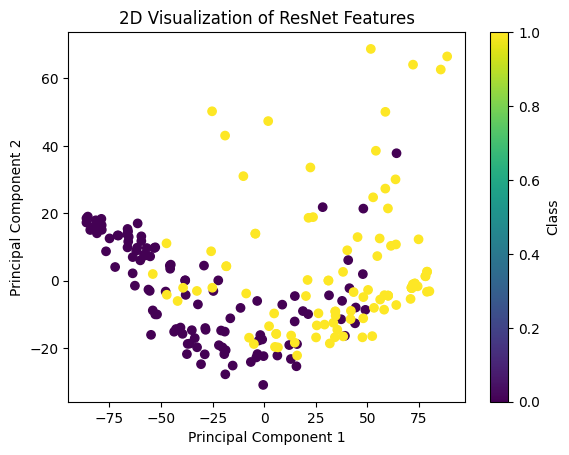

In [35]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # You can choose the number of components as per your requirement
features_resnet_pca = pca.fit_transform(features_resnet)

# Plot the features
plt.scatter(features_resnet_pca[:, 0], features_resnet_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of ResNet Features')
plt.colorbar(label='Class')
plt.show()

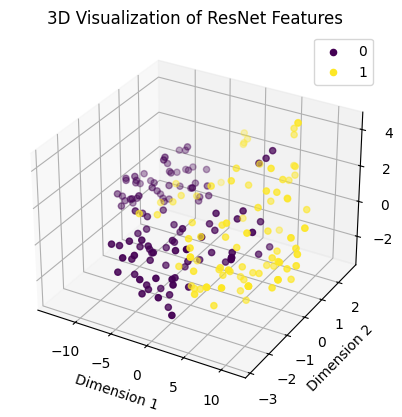

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)  # You can choose the number of components as per your requirement
features_resnet_tsne = tsne.fit_transform(features_resnet)

# Plot the features in 3D with different colors for each class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors for each class
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_train))))

for i, label in enumerate(np.unique(y_train)):
    ax.scatter(features_resnet_tsne[y_train == label, 0],
               features_resnet_tsne[y_train == label, 1],
               features_resnet_tsne[y_train == label, 2],
               c=[colors[i]], label=label)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('3D Visualization of ResNet Features')
plt.legend()
plt.show()

In [37]:
len(features_resnet[0])

100352

In [38]:
feature_extractor_resnet152=ResNet152_model.predict(x_train)

features_resnet152 = feature_extractor_resnet152.reshape(feature_extractor_resnet152.shape[0], -1)
# features_resnet152

7/7 [==============================] - 29s 3s/step


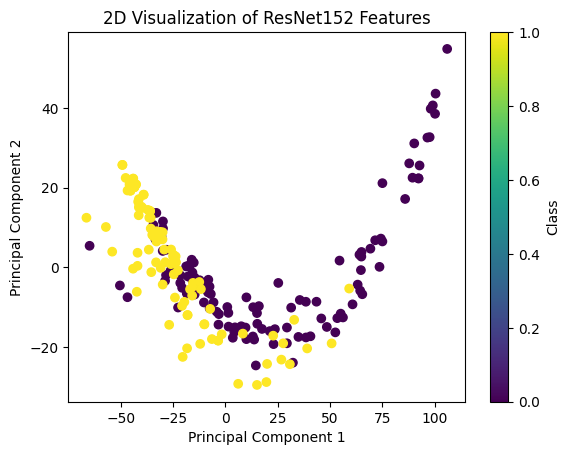

In [39]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # You can choose the number of components as per your requirement
features_resnet152_pca = pca.fit_transform(features_resnet152)

# Plot the features
plt.scatter(features_resnet152_pca[:, 0], features_resnet152_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of ResNet152 Features')
plt.colorbar(label='Class')
plt.show()

In [41]:
X_for_RF = features #This is our X input to RF

In [42]:
X_for_RF_vgg19 = features_vgg19

In [43]:
X_for_RF_resnet = features_resnet

In [44]:
X_for_RF_resnet152 = features_resnet152

### Random Forest on VGG16 and ResNet50

In [45]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model_vgg19 = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model_resnet = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model_resnet152 = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [46]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [47]:
RF_model_vgg19.fit(X_for_RF_vgg19, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [48]:
RF_model_resnet.fit(X_for_RF_resnet, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [49]:
RF_model_resnet152.fit(X_for_RF_resnet152, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [50]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

2/2 [==============================] - 5s 2s/step


In [51]:
#Send test data through same feature extractor process
X_test_feature_vgg19 = VGG19_model.predict(x_test)
X_test_features_vgg19 = X_test_feature_vgg19.reshape(X_test_feature_vgg19.shape[0], -1)

2/2 [==============================] - 7s 3s/step


In [52]:
X_test_feature_resnet = ResNet_model.predict(x_test)
X_test_features_resnet = X_test_feature_resnet.reshape(X_test_feature_resnet.shape[0], -1)

2/2 [==============================] - 3s 1s/step


In [53]:
X_test_feature_resnet152 = ResNet152_model.predict(x_test)
X_test_features_resnet152 = X_test_feature_resnet152.reshape(X_test_feature_resnet152.shape[0], -1)

2/2 [==============================] - 7s 3s/step


In [157]:
#Now predict vgg16 using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [158]:
#Now predict vgg19 using the trained RF model. 
prediction_RF_vgg19 = RF_model_vgg19.predict(X_test_features_vgg19)
#Inverse le transform to get original label back. 
prediction_RF_vgg19 = le.inverse_transform(prediction_RF_vgg19)

In [159]:
#Now predict resnet50 using the trained RF model. 
prediction_RF_resnet = RF_model_resnet.predict(X_test_features_resnet)
#Inverse le transform to get original label back. 
prediction_RF_resnet = le.inverse_transform(prediction_RF_resnet)

In [160]:
#Now predict resnet152 using the trained RF model. 
prediction_RF_resnet152 = RF_model_resnet152.predict(X_test_features_resnet152)
#Inverse le transform to get original label back. 
prediction_RF_resnet152 = le.inverse_transform(prediction_RF_resnet152)

In [161]:
#Print overall accuracy of Random Forest using VGG16
from sklearn import metrics
Accuracy_RF_VGG16 = metrics.accuracy_score(test_labels, prediction_RF)
print ("Accuracy_RF_VGG16 = ", Accuracy_RF_VGG16)

Accuracy_RF_VGG16 =  0.8490566037735849


In [162]:
#Print overall accuracy of Random Forest using VGG16
from sklearn import metrics
Accuracy_RF_VGG19 = metrics.accuracy_score(test_labels, prediction_RF_vgg19)
print ("Accuracy_RF_VGG19 = ", Accuracy_RF_VGG19)

Accuracy_RF_VGG19 =  0.8490566037735849


In [163]:
#Print overall accuracy of Random Forest using resnet50
from sklearn import metrics
Accuracy_RF_ResNet50 = metrics.accuracy_score(test_labels, prediction_RF_resnet)
print ("Accuracy_RF_ResNet50 = ", Accuracy_RF_ResNet50)

Accuracy_RF_ResNet50 =  0.8867924528301887


In [164]:
#Print overall accuracy of Random Forest using resnet152
from sklearn import metrics
Accuracy_RF_ResNet152 = metrics.accuracy_score(test_labels, prediction_RF_resnet152)
print ("Accuracy_RF_ResNet152 = ", Accuracy_RF_ResNet152)

Accuracy_RF_ResNet152 =  0.8679245283018868


acc =  0.8490566037735849
sensitivity =  1.0
precision =  0.7575757575757576
F1_score 0.8620689655172413
specificity =  0.7142857142857143


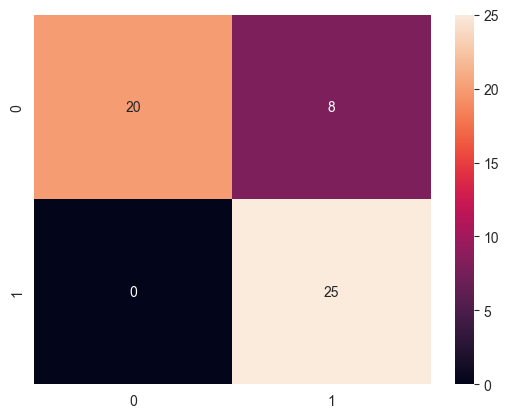

In [165]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
#Confusion Matrix - verify accuracy of each class

cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp))

acc =  0.8490566037735849
sensitivity =  0.96
precision =  0.7741935483870968
F1_score 0.8571428571428571
specificity =  0.75


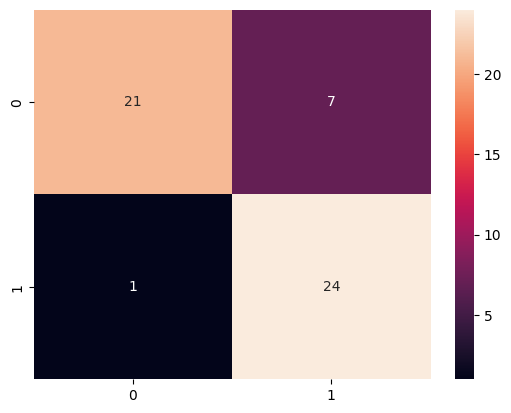

In [62]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
#Confusion Matrix - verify accuracy of each class

cm = confusion_matrix(test_labels, prediction_RF_vgg19)
sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

acc =  0.8867924528301887
sensitivity =  0.96
precision =  0.8275862068965517
F1_score 0.888888888888889
specificity =  0.8214285714285714


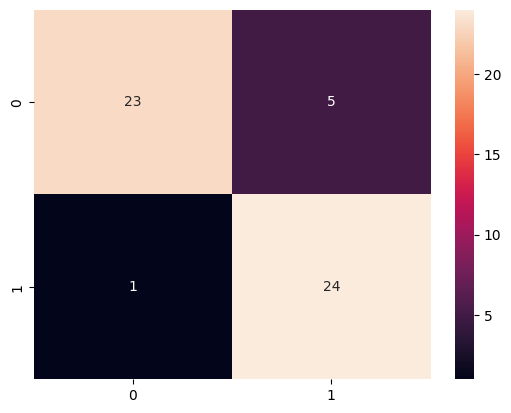

In [63]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF_resnet)
#print(cm)
sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp))  

acc =  0.8679245283018868
sensitivity =  0.88
precision =  0.8461538461538461
F1_score 0.8627450980392156
specificity =  0.8571428571428571


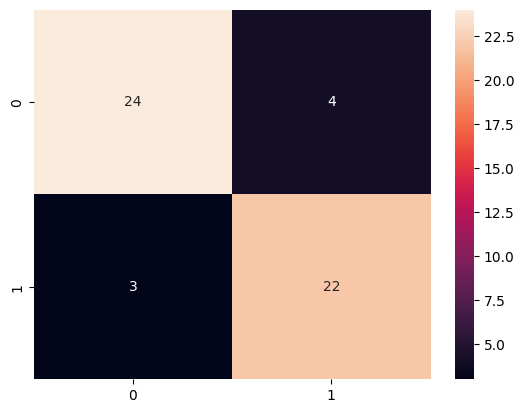

In [64]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF_resnet152)
#print(cm)
sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp))  

1/1 [==============================] - 0s 227ms/step
The prediction for this image is:  ['HealthySpiral']
The actual label for this image is:  HealthySpiral


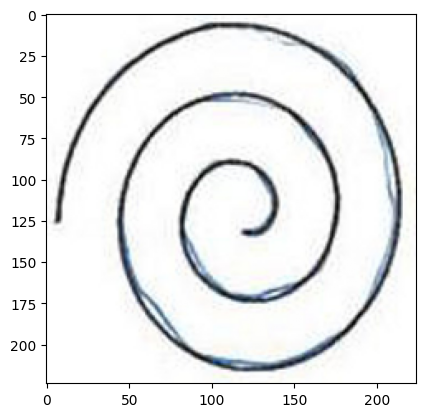

In [65]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

### SVM on VGG16 and Resnet50

In [93]:
from sklearn.svm import SVC

svm_model = SVC(C=1.0,
    kernel='linear',)
svm_model_vgg19 = SVC(C=1.0,
    kernel='linear',)
svm_model_resnet = SVC(C=1.0, kernel = 'linear')
svm_model_resnet152 = SVC(C=1.0, kernel = 'linear')

In [94]:
svm_model.fit(X_for_RF, y_train)
svm_model_vgg19.fit(X_for_RF_vgg19, y_train)
svm_model_resnet.fit(X_for_RF_resnet, y_train)
svm_model_resnet152.fit(X_for_RF_resnet152, y_train)

SVC(kernel='linear')

In [95]:
#Now predict using the trained RF model. 
prediction_svm = svm_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_svm = le.inverse_transform(prediction_svm)

#Now predict using the trained RF model. 
prediction_svm_vgg19 = svm_model_vgg19.predict(X_test_features_vgg19)
#Inverse le transform to get original label back. 
prediction_svm_vgg19 = le.inverse_transform(prediction_svm_vgg19)

#Now predict using the trained RF model. 
prediction_svm_resnet = svm_model_resnet.predict(X_test_features_resnet)
#Inverse le transform to get original label back. 
prediction_svm_resnet = le.inverse_transform(prediction_svm_resnet)

#Now predict using the trained RF model. 
prediction_svm_resnet152 = svm_model_resnet152.predict(X_test_features_resnet152)
#Inverse le transform to get original label back. 
prediction_svm_resnet152 = le.inverse_transform(prediction_svm_resnet152)

In [96]:
#Print overall accuracy
from sklearn import metrics
Accuracy_SVM_VGG16 = metrics.accuracy_score(test_labels, prediction_svm)
print ("Accuracy VGG16 = ", Accuracy_SVM_VGG16)
Accuracy_SVM_VGG19 = metrics.accuracy_score(test_labels, prediction_svm_vgg19)
print ("Accuracy VGG19 = ", Accuracy_SVM_VGG19)
Accuracy_SVM_ResNet50 = metrics.accuracy_score(test_labels, prediction_svm_resnet)
print ("Accuracy ResNet50 = ", Accuracy_SVM_ResNet50)
Accuracy_SVM_ResNet152 = metrics.accuracy_score(test_labels, prediction_svm_resnet152)
print ("Accuracy ResNet152 = ", Accuracy_SVM_ResNet152)

Accuracy VGG16 =  0.9433962264150944
Accuracy VGG19 =  0.9433962264150944
Accuracy ResNet50 =  0.9056603773584906
Accuracy ResNet152 =  0.8867924528301887


acc =  0.9433962264150944
sensitivity =  0.96
precision =  0.9230769230769231
F1_score 0.9411764705882353
specificity =  0.9285714285714286


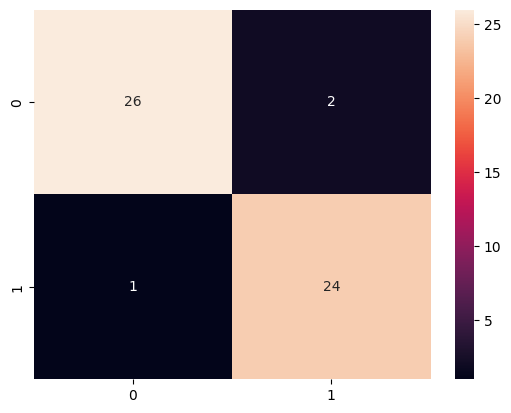

In [97]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_svm)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

acc =  0.9433962264150944
sensitivity =  1.0
precision =  0.8928571428571429
F1_score 0.9433962264150945
specificity =  0.8928571428571429


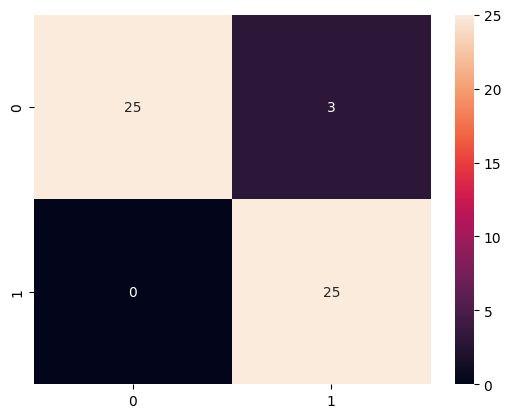

In [98]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_svm_vgg19)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

acc =  0.9056603773584906
sensitivity =  0.84
precision =  0.9545454545454546
F1_score 0.8936170212765958
specificity =  0.9642857142857143


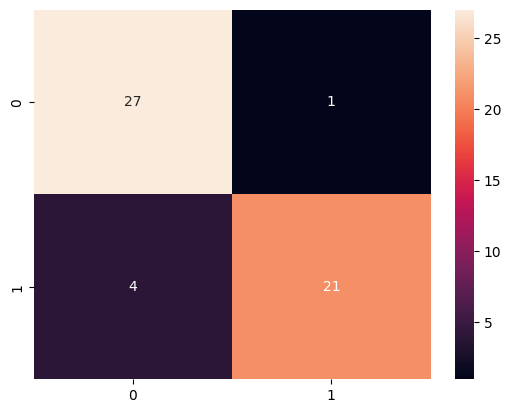

In [99]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_svm_resnet)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

acc =  0.8867924528301887
sensitivity =  0.88
precision =  0.88
F1_score 0.88
specificity =  0.8928571428571429


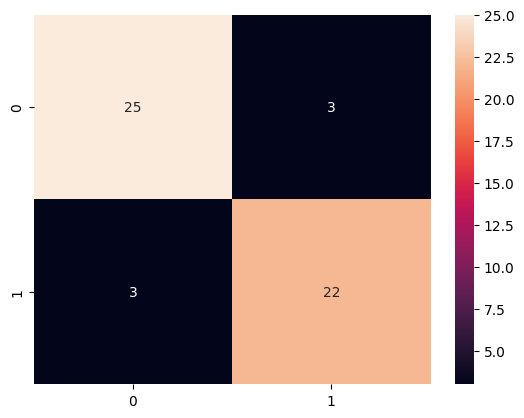

In [100]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_svm_resnet152)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

### K_fold cross validation

In [86]:
# # from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics

# # svm_model = SVC(C=1.0, kernel='linear')

# # Perform k-fold cross-validation
# k = 5  # Number of folds
# cv_scores = cross_val_score(svm_model, X_for_RF, train_labels, cv=k)

# # Print accuracy for each fold
# for i, accuracy in enumerate(cv_scores, 1):
#     print("Fold {} Accuracy: {:.4f}".format(i, accuracy))

# # Calculate the mean accuracy and standard deviation
# mean_accuracy = cv_scores.mean()
# std_dev_accuracy = cv_scores.std()

# print("Mean Accuracy:", mean_accuracy)
# print("Standard Deviation of Accuracy:", std_dev_accuracy)


In [163]:
# # from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics

# # svm_model = SVC(C=1.0, kernel='linear')

# # Perform k-fold cross-validation
# k = 5  # Number of folds
# cv_scores = cross_val_score(svm_model, X_for_RF_vgg19, train_labels, cv=k)

# # Print accuracy for each fold
# for i, accuracy in enumerate(cv_scores, 1):
#     print("Fold {} Accuracy: {:.4f}".format(i, accuracy))

# # Calculate the mean accuracy and standard deviation
# mean_accuracy_vgg19 = cv_scores.mean()
# std_dev_accuracy_vgg19 = cv_scores.std()

# print("Mean Accuracy_VGG19:", mean_accuracy_vgg19)
# print("Standard Deviation of Accuracy_VGG19:", std_dev_accuracy_vgg19)

Fold 1 Accuracy: 0.9302
Fold 2 Accuracy: 0.9048
Fold 3 Accuracy: 0.9762
Fold 4 Accuracy: 0.8810
Fold 5 Accuracy: 0.8810
Mean Accuracy_VGG19: 0.9146179401993354
Standard Deviation of Accuracy_VGG19: 0.03577394212317959


In [165]:
# # from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics

# # svm_model = SVC(C=1.0, kernel='linear')

# # Perform k-fold cross-validation
# k = 5  # Number of folds
# cv_scores = cross_val_score(svm_model, X_for_RF_resnet, train_labels, cv=k)

# # Print accuracy for each fold
# for i, accuracy in enumerate(cv_scores, 1):
#     print("Fold {} Accuracy: {:.4f}".format(i, accuracy))

# # Calculate the mean accuracy and standard deviation
# mean_accuracy_resnet = cv_scores.mean()
# std_dev_accuracy_resnet = cv_scores.std()

# print("Mean Accuracy_ResNet50:", mean_accuracy_resnet)
# print("Standard Deviation of Accuracy_ResNet50:", std_dev_accuracy_resnet)

Fold 1 Accuracy: 0.9070
Fold 2 Accuracy: 0.9524
Fold 3 Accuracy: 0.9524
Fold 4 Accuracy: 0.8810
Fold 5 Accuracy: 0.7857
Mean Accuracy_ResNet50: 0.8956810631229237
Standard Deviation of Accuracy_ResNet50: 0.06142796351263325


In [101]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
test_labels

array(['HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'HealthySpiral', 'HealthySpiral', 'HealthySpiral', 'HealthySpiral',
       'PatientSpiral', 'PatientSpiral', 'PatientSpiral', 'PatientSpiral',
       'PatientSpiral', 'PatientSpiral', 'PatientSpiral', 'PatientSpiral',
       'PatientSpiral', 'PatientSpiral', 'PatientSpiral', 'PatientSpiral',
       'PatientSpiral', 'PatientSpiral', 'PatientSpiral', 'PatientSpiral',
       'PatientSpiral', 'PatientSpiral', 'PatientSpiral', 'PatientSpiral',
       'PatientSpiral', 'PatientSpiral', 'PatientSpiral', 'PatientSpiral',
       'PatientSpiral'], 

### AdaBoost Classifier

In [228]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define weak learner (base estimator)
weak_learner = DecisionTreeClassifier()

# Initialize AdaBoost classifier with weak learner
adaboost_classifier = AdaBoostClassifier(estimator=weak_learner, n_estimators=10, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier.fit(X_for_RF, y_train)

# Make predictions
predictions_DT_vgg16 = adaboost_classifier.predict(X_test_features)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_DT_vgg16)
print("AdaBoost Classifier Accuracy:", accuracy)



AdaBoost Classifier Accuracy: 0.7735849056603774


acc =  0.7735849056603774
sensitivity =  0.72
precision =  0.782608695652174
F1_score 0.7499999999999999
specificity =  0.8214285714285714


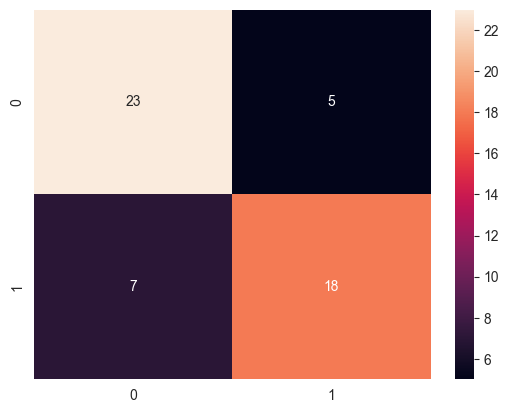

In [229]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_DT_vgg16)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [230]:
# Define weak learner (base estimator)
weak_learner = DecisionTreeClassifier()

# Initialize AdaBoost classifier with weak learner
adaboost_classifier_vgg19 = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier_vgg19.fit(X_for_RF_vgg19, y_train)

# Make predictions
predictions_DT_vgg19 = adaboost_classifier_vgg19.predict(X_test_features_vgg19)
# Calculate accuracy
accuracy_vgg19 = accuracy_score(y_test, predictions_DT_vgg19)
print("AdaBoost Classifier Accuracy_VGG19:", accuracy_vgg19)

AdaBoost Classifier Accuracy_VGG19: 0.660377358490566


acc =  0.660377358490566
sensitivity =  0.6
precision =  0.6521739130434783
F1_score 0.6250000000000001
specificity =  0.7142857142857143


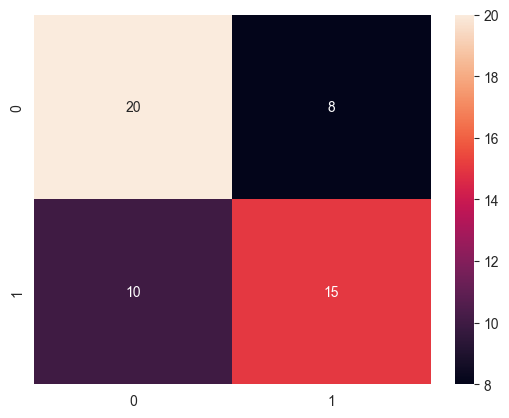

In [231]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_DT_vgg19)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [232]:
# Define weak learner (base estimator)
weak_learner = DecisionTreeClassifier()

# Initialize AdaBoost classifier with weak learner
adaboost_classifier_resnet = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier_resnet.fit(X_for_RF_resnet, y_train)

# Make predictions
predictions_DT_resnet = adaboost_classifier_resnet.predict(X_test_features_resnet)
# Calculate accuracy
accuracy_resnet = accuracy_score(y_test, predictions_DT_resnet)
print("AdaBoost Classifier Accuracy_resnet:", accuracy_resnet)

AdaBoost Classifier Accuracy_resnet: 0.6981132075471698


acc =  0.6981132075471698
sensitivity =  0.76
precision =  0.6551724137931034
F1_score 0.7037037037037037
specificity =  0.6428571428571429


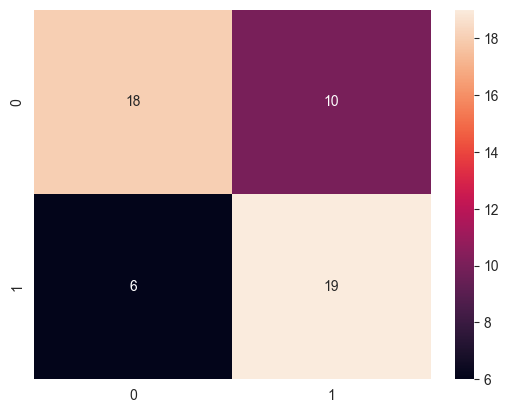

In [233]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_DT_resnet)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [234]:
# Define weak learner (base estimator)
weak_learner = DecisionTreeClassifier()

# Initialize AdaBoost classifier with weak learner
adaboost_classifier_resnet152 = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier_resnet152.fit(X_for_RF_resnet152, y_train)

# Make predictions
predictions_DT_resnet152 = adaboost_classifier_resnet152.predict(X_test_features_resnet152)
# Calculate accuracy
accuracy_resnet152 = accuracy_score(y_test, predictions_DT_resnet152)
print("AdaBoost Classifier Accuracy_resnet152:", accuracy_resnet152)

AdaBoost Classifier Accuracy_resnet152: 0.6792452830188679


acc =  0.6792452830188679
sensitivity =  0.72
precision =  0.6428571428571429
F1_score 0.6792452830188679
specificity =  0.6428571428571429


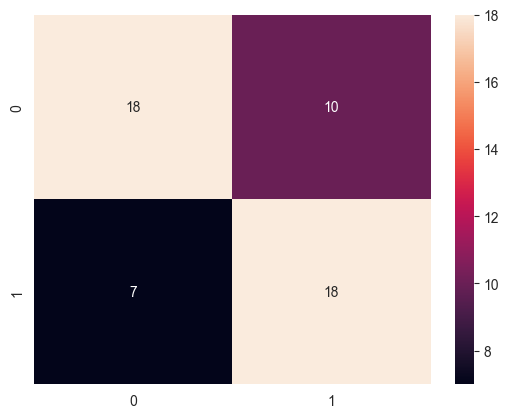

In [235]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_DT_resnet152)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [218]:

# Define weak learner (base estimator)
weak_learner = SVC(C=1.0, kernel='linear')

# Initialize AdaBoost classifier with weak learner
adaboost_classifier = AdaBoostClassifier(estimator=weak_learner, n_estimators=10, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier.fit(X_for_RF, y_train)

# Make predictions
predictions = adaboost_classifier.predict(X_test_features)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("AdaBoost Classifier Accuracy:", accuracy)



AdaBoost Classifier Accuracy: 0.9622641509433962


acc =  0.9622641509433962
sensitivity =  1.0
precision =  0.9259259259259259
F1_score 0.9615384615384615
specificity =  0.9285714285714286


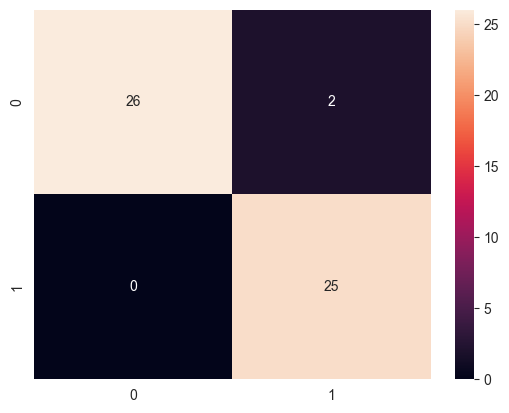

In [219]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [220]:
# Define weak learner (base estimator)
weak_learner = SVC(C=1.0, kernel='linear')

# Initialize AdaBoost classifier with weak learner
adaboost_classifier_vgg19 = AdaBoostClassifier(estimator=weak_learner, n_estimators=10, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier_vgg19.fit(X_for_RF_vgg19, y_train)

# Make predictions
predictions_vgg19 = adaboost_classifier_vgg19.predict(X_test_features_vgg19)
# Calculate accuracy
accuracy_vgg19 = accuracy_score(y_test, predictions_vgg19)
print("AdaBoost Classifier Accuracy_VGG19:", accuracy_vgg19)

AdaBoost Classifier Accuracy_VGG19: 0.9433962264150944


acc =  0.9433962264150944
sensitivity =  1.0
precision =  0.8928571428571429
F1_score 0.9433962264150945
specificity =  0.8928571428571429


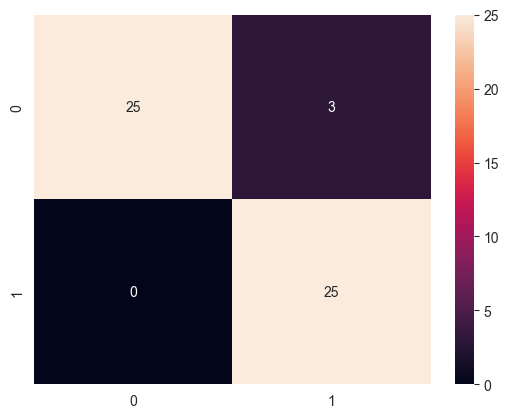

In [221]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_vgg19)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [222]:
# Define weak learner (base estimator)
weak_learner = SVC(C=1.0, kernel='linear')

# Initialize AdaBoost classifier with weak learner
adaboost_classifier_resnet = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier_resnet.fit(X_for_RF_resnet, y_train)

# Make predictions
predictions_resnet = adaboost_classifier_resnet.predict(X_test_features_resnet)
# Calculate accuracy
accuracy_resnet = accuracy_score(y_test, predictions_resnet)
print("AdaBoost Classifier Accuracy_resnet:", accuracy_resnet)

AdaBoost Classifier Accuracy_resnet: 0.9245283018867925


acc =  0.9245283018867925
sensitivity =  0.88
precision =  0.9565217391304348
F1_score 0.9166666666666666
specificity =  0.9642857142857143


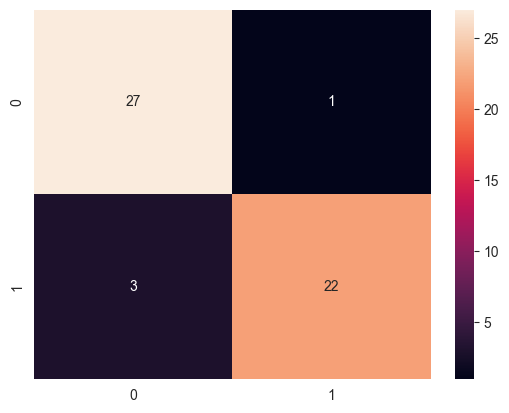

In [223]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_resnet)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [224]:
# Define weak learner (base estimator)
weak_learner = SVC(C=1.0, kernel='linear')

# Initialize AdaBoost classifier with weak learner
adaboost_classifier_resnet152 = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, algorithm='SAMME', random_state=42)

# Train AdaBoost classifier
adaboost_classifier_resnet152.fit(X_for_RF_resnet152, y_train)

# Make predictions
predictions_resnet152 = adaboost_classifier_resnet152.predict(X_test_features_resnet152)
# Calculate accuracy
accuracy_resnet152 = accuracy_score(y_test, predictions_resnet152)
print("AdaBoost Classifier Accuracy_resnet152:", accuracy_resnet152)

AdaBoost Classifier Accuracy_resnet152: 0.8679245283018868


acc =  0.8679245283018868
sensitivity =  0.84
precision =  0.875
F1_score 0.8571428571428572
specificity =  0.8928571428571429


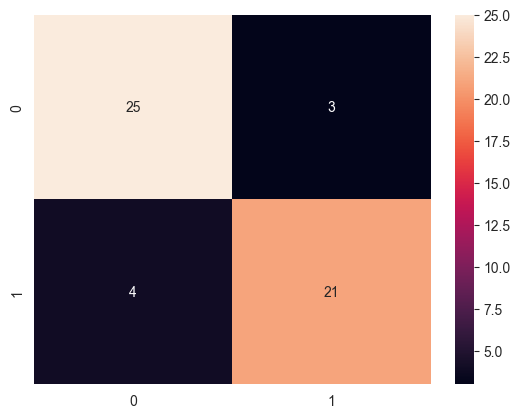

In [225]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_resnet152)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

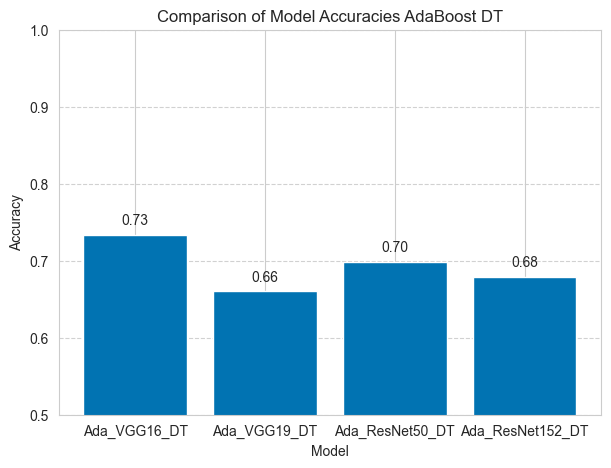

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# List of model names and their corresponding accuracy scores
model_names = ['Ada_VGG16_DT','Ada_VGG19_DT', 'Ada_ResNet50_DT', 'Ada_ResNet152_DT']
# accuracy_scores = [predictions_DT_vgg16, predictions_DT_vgg19, predictions_DT_resnet, predictions_resnet152]  # Replace with actual accuracy scores
accuracy_scores = [0.733, 0.66, 0.698, 0.679] 

# Plotting the graph
plt.figure(figsize=(7, 5))  # Adjust figure size as needed
bars = plt.bar(model_names, accuracy_scores)
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies AdaBoost DT')
plt.ylim(0.5, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add grid lines
plt.show()


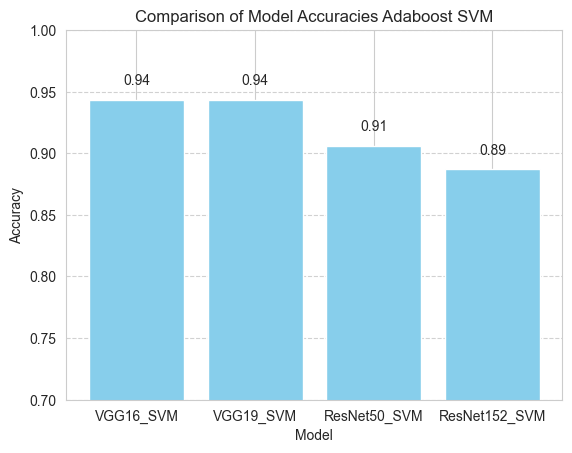

In [227]:
import matplotlib.pyplot as plt
plt.minorticks_on()
sns.set_style("whitegrid")
sns.set_palette("colorblind")
# List of model names and their corresponding accuracy scores
model_names = ['VGG16_SVM','VGG19_SVM', 'ResNet50_SVM', 'ResNet152_SVM']
accuracy_scores = [Accuracy_SVM_VGG16, Accuracy_SVM_VGG19, Accuracy_SVM_ResNet50, Accuracy_SVM_ResNet152]  # Replace with actual accuracy scores

# Plotting the graph
# plt.figure(figsize=(6, 3))
bars = plt.bar(model_names, accuracy_scores, color='skyblue')
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Adaboost SVM')
plt.ylim(0.7, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add grid lines
plt.show()

### Bagging (base model = Decision Tree) 

In [121]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier = DecisionTreeClassifier()

# Define the bagging classifier
n = [20]
for i in range(len(n)):
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier.fit(X_for_RF, y_train)
    
    # Make predictions on the test set
    predictions_bag = bagging_classifier.predict(X_test_features)
    predictions_bag = le.inverse_transform(predictions_bag)
    
    # Calculate accuracy
    accuracy_bag_VGG16 = accuracy_score(test_labels, predictions_bag)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_VGG16))

Accuracy 20: 0.9811320754716981


acc =  0.9811320754716981
sensitivity =  0.96
precision =  1.0
F1_score 0.9795918367346939
specificity =  1.0


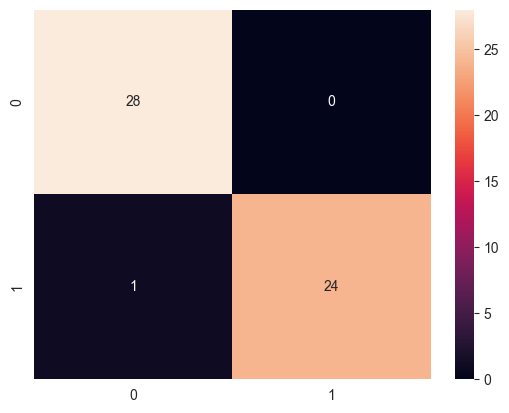

In [123]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier = DecisionTreeClassifier()

# Define the bagging classifier
n = [30]
for i in range(len(n)):
    bagging_classifier_vgg19 = BaggingClassifier(base_classifier, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_vgg19.fit(X_for_RF_vgg19, y_train)
    
    # Make predictions on the test set
    predictions_bag_vgg19 = bagging_classifier_vgg19.predict(X_test_features_vgg19)
    predictions_bag_vgg19 = le.inverse_transform(predictions_bag_vgg19)
    
    # Calculate accuracy
    accuracy_bag_vgg19 = accuracy_score(test_labels, predictions_bag_vgg19)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_vgg19))

Accuracy 30: 0.9245283018867925


acc =  0.9245283018867925
sensitivity =  0.96
precision =  0.8888888888888888
F1_score 0.923076923076923
specificity =  0.8928571428571429


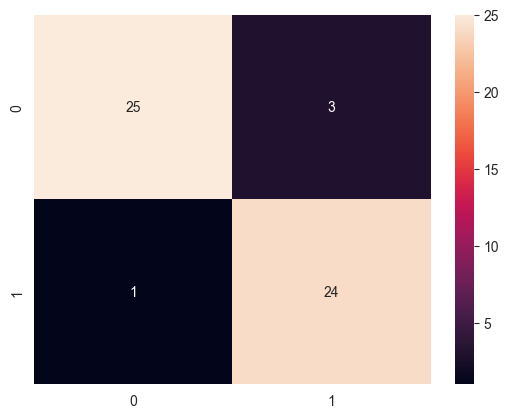

In [126]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_vgg19)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [127]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier = DecisionTreeClassifier()

# Define the bagging classifier
n = [90]
for i in range(len(n)):
    bagging_classifier_resnet = BaggingClassifier(base_classifier, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_resnet.fit(X_for_RF_resnet, y_train)
    
    # Make predictions on the test set
    predictions_bag_resnet = bagging_classifier_resnet.predict(X_test_features_resnet)
    predictions_bag_resnet = le.inverse_transform(predictions_bag_resnet)
    
    # Calculate accuracy
    accuracy_bag_resnet = accuracy_score(test_labels, predictions_bag_resnet)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_resnet))

Accuracy 90: 0.8679245283018868


acc =  0.8679245283018868
sensitivity =  0.92
precision =  0.8214285714285714
F1_score 0.8679245283018867
specificity =  0.8214285714285714


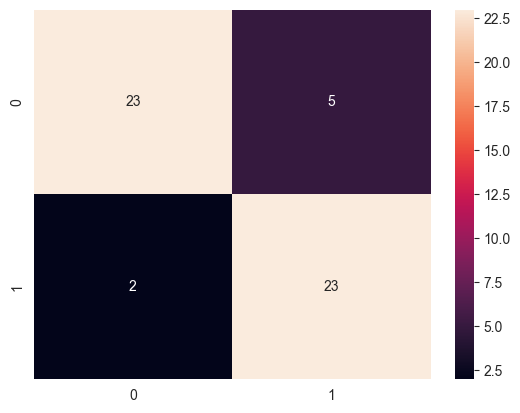

In [128]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_resnet)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier = DecisionTreeClassifier()

# Define the bagging classifier
n = [20]
for i in range(len(n)):
    bagging_classifier_resnet152 = BaggingClassifier(base_classifier, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_resnet152.fit(X_for_RF_resnet152, y_train)
    
    # Make predictions on the test set
    predictions_bag_resnet152 = bagging_classifier_resnet152.predict(X_test_features_resnet152)
    predictions_bag_resnet152 = le.inverse_transform(predictions_bag_resnet152)
    
    # Calculate accuracy
    accuracy_bag_resnet152 = accuracy_score(test_labels, predictions_bag_resnet152)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_resnet152))

Accuracy 20: 0.8490566037735849


acc =  0.8490566037735849
sensitivity =  0.8
precision =  0.8695652173913043
F1_score 0.8333333333333333
specificity =  0.8928571428571429


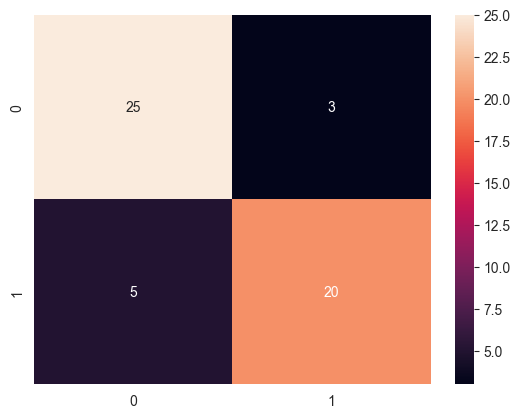

In [130]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_resnet152)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

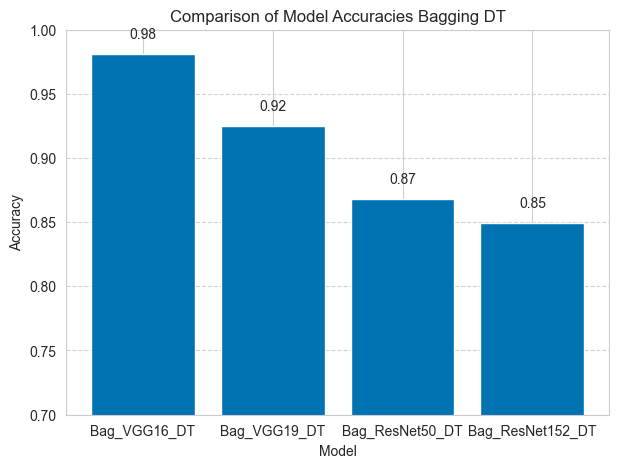

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# List of model names and their corresponding accuracy scores
model_names = ['Bag_VGG16_DT','Bag_VGG19_DT', 'Bag_ResNet50_DT', 'Bag_ResNet152_DT']
accuracy_scores = [accuracy_bag_VGG16,accuracy_bag_vgg19, accuracy_bag_resnet, accuracy_bag_resnet152]  # Replace with actual accuracy scores

# Plotting the graph
plt.figure(figsize=(7, 5))  # Adjust figure size as needed
bars = plt.bar(model_names, accuracy_scores)
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Bagging DT')
plt.ylim(0.7, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add grid lines
plt.show()


#### bag DT with sampling

In [149]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Define base classifier (you can use any classifier)
# base_classifier_ = DecisionTreeClassifier()

# # Define the bagging classifier
# # n = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# # for i in range(len(n)):
# i = 0
# bagging_classifier_ = BaggingClassifier(base_classifier_, n_estimators=20, max_samples=0.75, bootstrap = True,  random_state=42)

# # Train the bagging classifier
# bagging_classifier_.fit(X_for_RF, y_train)

# # Make predictions on the test set
# predictions_bag_ = bagging_classifier_.predict(X_test_features)
# predictions_bag_ = le.inverse_transform(predictions_bag_)

# # Calculate accuracy
# accuracy_bag_ = accuracy_score(test_labels, predictions_bag_)
# print("Accuracy {}: {}".format(i, accuracy_bag_))

Accuracy 0: 0.8867924528301887


In [150]:
# bagging_classifier_.estimators_samples_[0]

array([ 41, 122, 202,  76, 130, 137,  92, 199, 147, 114, 120, 189,  28,
        84,   6, 141,  68, 145,  82,  51, 105,  74,  34,  93,   4,  34,
         8, 142, 205,  32,  59,  95,   3, 150, 107,  46, 116, 199, 194,
       105, 181, 177,  77, 184,  80,  64,   0, 122,  59, 103,  81,  41,
       181,  91,  70, 132,   0,  60, 184,  23, 156,  14, 183, 203, 123,
        45, 209,  84, 165, 100, 173, 111,  23,  70,   1,  81, 172,  38,
        97, 111, 115,  52, 182,   9,  82,  71, 109,  73, 191, 116, 196,
       200,  14,  32, 176, 104, 174,  43, 104,  45, 196, 203, 177, 101,
        53,   5, 114, 142, 146,  36, 152,  47,  23,  84,  96,  39, 120,
       143,  36,   0, 150, 135, 122, 181,  13,   9,  15, 125, 191, 156,
       169,   6,  77,  48,  27,  70, 191, 128,  60, 200, 148, 173,  49,
       131,  12,  85, 184,  47,  99,  62, 169, 119, 145,   1,  90, 164,
       166,  36])

### bagging with svm

In [152]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier_svm = SVC(C = 1.0, kernel = 'linear')

# Define the bagging classifier
n = [10]

for i in range(len(n)):
    bagging_classifier_svm = BaggingClassifier(base_classifier_svm, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_svm.fit(X_for_RF, y_train)
    
    # Make predictions on the test set
    predictions_bag_svm = bagging_classifier_svm.predict(X_test_features)
    predictions_bag_svm = le.inverse_transform(predictions_bag_svm)
    
    # Calculate accuracy
    accuracy_bag_svm = accuracy_score(test_labels, predictions_bag_svm)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_svm))

Accuracy 10: 0.9622641509433962


acc =  0.9622641509433962
sensitivity =  1.0
precision =  0.9259259259259259
F1_score 0.9615384615384615
specificity =  0.9285714285714286


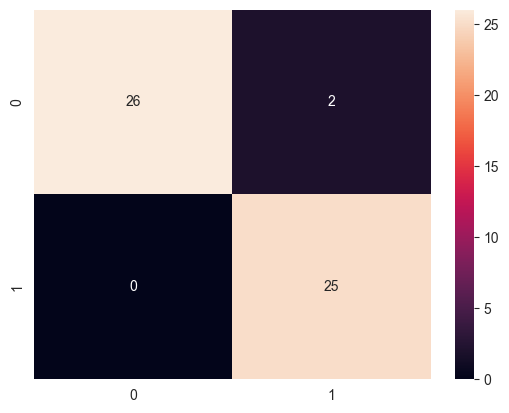

In [168]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_svm)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [133]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier_svm = SVC(C = 1.0, kernel = 'linear')

# Define the bagging classifier
n = [20]

for i in range(len(n)):
    bagging_classifier_svm_vgg19 = BaggingClassifier(base_classifier_svm, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_svm_vgg19.fit(X_for_RF_vgg19, y_train)
    
    # Make predictions on the test set
    predictions_bag_svm_vgg19 = bagging_classifier_svm_vgg19.predict(X_test_features_vgg19)
    predictions_bag_svm_vgg19 = le.inverse_transform(predictions_bag_svm_vgg19)
    
    # Calculate accuracy
    accuracy_bag_svm_vgg19 = accuracy_score(test_labels, predictions_bag_svm_vgg19)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_svm_vgg19))

Accuracy 20: 0.9245283018867925


acc =  0.9245283018867925
sensitivity =  1.0
precision =  0.8620689655172413
F1_score 0.9259259259259259
specificity =  0.8571428571428571


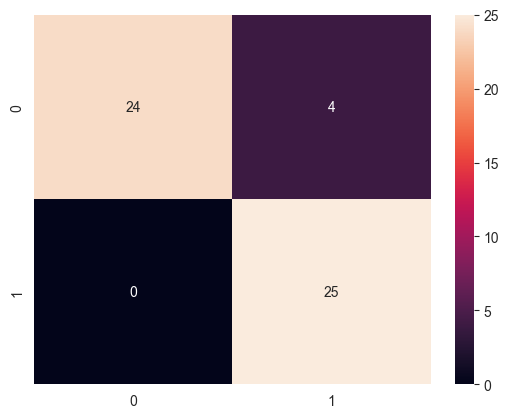

In [169]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_svm_vgg19)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier_svm = SVC(C = 1.0, kernel = 'linear')

# Define the bagging classifier
n = [5]

for i in range(len(n)):
    bagging_classifier_svm_resnet = BaggingClassifier(base_classifier_svm, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_svm_resnet.fit(X_for_RF_resnet, y_train)
    
    # Make predictions on the test set
    predictions_bag_svm_resnet = bagging_classifier_svm_resnet.predict(X_test_features_resnet)
    predictions_bag_svm_resnet = le.inverse_transform(predictions_bag_svm_resnet)
    
    # Calculate accuracy
    accuracy_bag_svm_resnet = accuracy_score(test_labels, predictions_bag_svm_resnet)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_svm_resnet))

Accuracy 5: 0.9245283018867925


acc =  0.9245283018867925
sensitivity =  0.92
precision =  0.92
F1_score 0.92
specificity =  0.9285714285714286


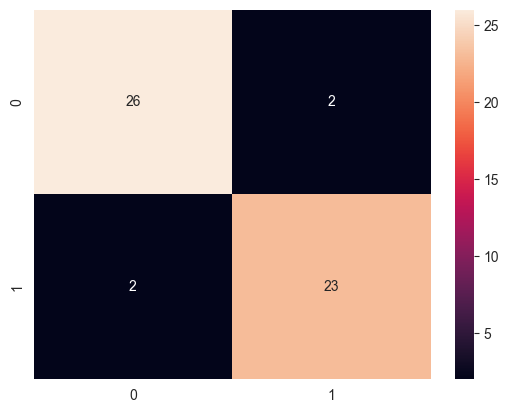

In [171]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_svm_resnet)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define base classifier (you can use any classifier)
base_classifier_svm = SVC(C = 1.0, kernel = 'linear')

# Define the bagging classifier
n = [20]

for i in range(len(n)):
    bagging_classifier_svm_resnet152 = BaggingClassifier(base_classifier_svm, n_estimators=n[i], random_state=42)
    
    # Train the bagging classifier
    bagging_classifier_svm_resnet152.fit(X_for_RF_resnet152, y_train)
    
    # Make predictions on the test set
    predictions_bag_svm_resnet152 = bagging_classifier_svm_resnet152.predict(X_test_features_resnet152)
    predictions_bag_svm_resnet152 = le.inverse_transform(predictions_bag_svm_resnet152)
    
    # Calculate accuracy
    accuracy_bag_svm_resnet152 = accuracy_score(test_labels, predictions_bag_svm_resnet152)
    print("Accuracy {}: {}".format(n[i], accuracy_bag_svm_resnet152))

Accuracy 20: 0.8490566037735849


acc =  0.8490566037735849
sensitivity =  0.84
precision =  0.84
F1_score 0.8399999999999999
specificity =  0.8571428571428571


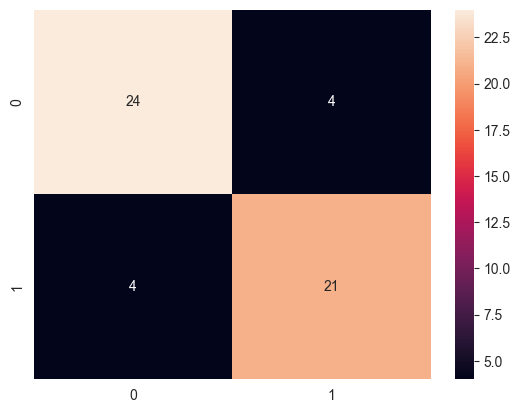

In [172]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions_bag_svm_resnet152)

sns.heatmap(cm, annot=True)

(tn, fp, fn, tp) = cm.flatten()
print("acc = ", (tp + tn) / float(cm.sum()))
recall = tp / float(tp + fn)
precision = tp / float(tp + fp)
print("sensitivity = ", recall)
print("precision = ", precision)
print("F1_score", (2*precision*recall)/(precision+recall))
print("specificity = ", tn / float(tn + fp)) 

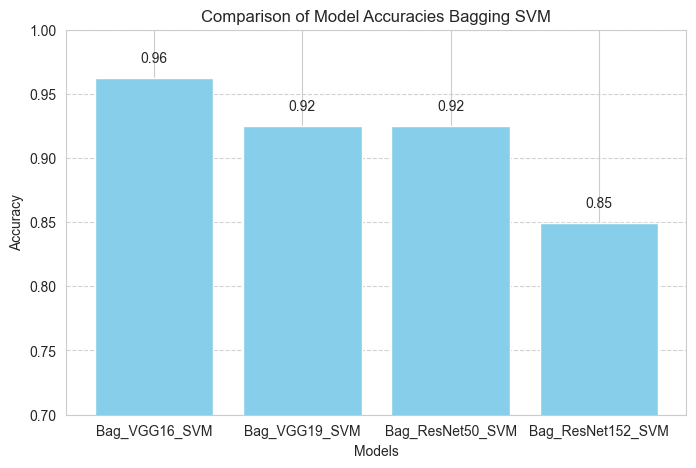

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# List of model names and their corresponding accuracy scores
model_names = ['Bag_VGG16_SVM','Bag_VGG19_SVM', 'Bag_ResNet50_SVM', 'Bag_ResNet152_SVM']
accuracy_scores = [accuracy_bag_svm,accuracy_bag_svm_vgg19, accuracy_bag_svm_resnet, accuracy_bag_svm_resnet152]  # Replace with actual accuracy scores

# Plotting the graph
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
bars = plt.bar(model_names, accuracy_scores, color='skyblue')
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Bagging SVM')
plt.ylim(0.7, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add grid lines
plt.show()


In [137]:
bagging_classifier_svm.estimators_samples_[0].shape

(211,)